In [1]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr,ttest_ind,mannwhitneyu
from sklearn.metrics.pairwise import cosine_similarity
rcParams['pdf.fonttype'] = 42

In [3]:
DataDir="./data/SimualtedSpatialData/dataset11/"
#DataDir="./data/pseudo_STData/dataset12/"
Spatial_data_adata = sc.read_h5ad(DataDir+'Spatial.h5ad')
gd_results=Spatial_data_adata.uns['density']
gd_results = gd_results.loc[:,np.unique(gd_results.columns)]
gd_results = (gd_results.T/gd_results.sum(axis=1)).T
gd_results = gd_results.fillna(0)
print(gd_results.columns)

Index(['B cells', 'Endothelial', 'Fibroblasts', 'Hepatocytes', 'Myeloid',
       'T cells'],
      dtype='object')


In [3]:
coGCNresults= sc.read_h5ad(DataDir+"results/coGCN_result.h5ad")
coGCN_results=pd.DataFrame(coGCNresults.X,index=coGCNresults.obs_names,columns=coGCNresults.var_names)
#coGCN_results=pd.read_csv(DataDir+'results/coGCN_result.txt',index_col=0)
coGCN_results = coGCN_results.loc[:,np.unique(coGCN_results.columns)]
intersect= gd_results.columns.intersection(coGCN_results.columns)
print(len(intersect))
coGCN_results=coGCN_results.loc[:,intersect]
coGCN_results = (coGCN_results.T/coGCN_results.sum(axis=1)).T
coGCN_results = coGCN_results.fillna(0)

gd_results=gd_results.loc[:,intersect]
gd_results = (gd_results.T/gd_results.sum(axis=1)).T
gd_results = gd_results.fillna(0)

tangram_results = pd.read_csv(DataDir+'results/Tangram_result.txt',index_col=0)
tangram_results = tangram_results.loc[:,np.unique(tangram_results.columns)]
tangram_results = (tangram_results.T/tangram_results.sum(axis=1)).T
tangram_results = tangram_results.fillna(0)

cell2loc_results = pd.read_csv(DataDir+'results/Cell2location_result.txt',index_col=0)
cell2loc_results.index = np.arange(len(cell2loc_results))
cell2loc_results.columns = [c.split('q05cell_abundance_w_sf_')[1] for c in cell2loc_results.columns]
cell2loc_results = cell2loc_results.loc[:,np.unique(cell2loc_results.columns)]
cell2loc_results=cell2loc_results.loc[:,intersect]
cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
cell2loc_results = cell2loc_results.fillna(0)

RCTD_results = pd.read_csv(DataDir+'results/RCTD_result.txt',index_col=0)
RCTD_results.index = np.arange(len(RCTD_results))
RCTD_results = RCTD_results.loc[:,np.unique(RCTD_results.columns)]
RCTD_results.columns = gd_results.columns
RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)
RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)
RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)
RCTD_results=RCTD_results.iloc[0:len(gd_results),:]
RCTD_results = (RCTD_results.T/RCTD_results.sum(axis=1)).T
RCTD_results = RCTD_results.fillna(0)


spatialdwls_results = pd.read_csv(DataDir+'results/SpatialDWLS_result.txt',index_col=0)
spatialdwls_results.index = np.arange(len(spatialdwls_results))
spatialdwls_results = spatialdwls_results.iloc[:,1:]
spatialdwls_results = spatialdwls_results.loc[:,np.unique(spatialdwls_results.columns)]
spatialdwls_results = (spatialdwls_results.T/spatialdwls_results.sum(axis=1)).T
spatialdwls_results = spatialdwls_results.fillna(0)

stereo_results = pd.read_csv(DataDir+'results/Stereoscope_result.txt',index_col=0)
stereo_results.index = np.arange(len(stereo_results))
stereo_results = stereo_results.loc[:,np.unique(stereo_results.columns)]
stereo_results=stereo_results.iloc[:,0:len(tangram_results.columns)]
stereo_results.columns = tangram_results.columns
stereo_results = (stereo_results.T/stereo_results.sum(axis=1)).T
stereo_results = stereo_results.fillna(0)

destvi_results = pd.read_csv(DataDir+'results/DestVI_result.txt',index_col=0)
destvi_results.index = np.arange(len(destvi_results))
destvi_results = destvi_results.loc[:,np.unique(destvi_results.columns)]
destvi_results=destvi_results.iloc[:,0:len(tangram_results.columns)]
destvi_results.columns = tangram_results.columns
destvi_results = (destvi_results.T/destvi_results.sum(axis=1)).T
destvi_results = destvi_results.fillna(0)

spotlight_results = pd.read_csv(DataDir+'results/SPOTlight_result.txt',index_col=0)
spotlight_results.index = np.arange(len(spotlight_results))
spotlight_results = spotlight_results.loc[:,np.unique(spotlight_results.columns)]
spotlight_results=spotlight_results.iloc[:,0:len(tangram_results.columns)]
spotlight_results.columns = tangram_results.columns
spotlight_results = (spotlight_results.T/spotlight_results.sum(axis=1)).T
spotlight_results = spotlight_results.fillna(0)

seurat_results = pd.read_csv(DataDir+'results/Seurat_result.txt',index_col=0)
seurat_results = seurat_results.iloc[:,1:-1]
seurat_results = seurat_results.loc[:,np.unique(seurat_results.columns)]
seurat_results=seurat_results.iloc[:,0:len(tangram_results.columns)]
seurat_results.columns = tangram_results.columns
seurat_results = (seurat_results.T/seurat_results.sum(axis=1)).T
seurat_results = seurat_results.fillna(0)

tangram_results=tangram_results.loc[:,intersect]
cell2loc_results=cell2loc_results.loc[:,intersect]
RCTD_results=RCTD_results.loc[:,intersect]
spatialdwls_results=spatialdwls_results.loc[:,intersect]
stereo_results=stereo_results.loc[:,intersect]
destvi_results=destvi_results.loc[:,intersect]
spotlight_results=spotlight_results.loc[:,intersect]
seurat_results=seurat_results.loc[:,intersect]

6


/tmp/ipykernel_10208/3862791041.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)
/tmp/ipykernel_10208/3862791041.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)
/tmp/ipykernel_10208/3862791041.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RCTD_results = RCTD_results.append(RCTD_results, ignore_index = True)


In [4]:
def ssim(im1,im2,M=1):
    im1, im2 = im1/im1.max(), im2/im2.max()
    mu1 = im1.mean()
    mu2 = im2.mean()
    sigma1 = np.sqrt(((im1 - mu1) ** 2).mean())
    sigma2 = np.sqrt(((im2 - mu2) ** 2).mean())
    sigma12 = ((im1 - mu1) * (im2 - mu2)).mean()
    k1, k2, L = 0.01, 0.03, M
    C1 = (k1*L) ** 2
    C2 = (k2*L) ** 2
    C3 = C2/2
    l12 = (2*mu1*mu2 + C1)/(mu1 ** 2 + mu2 ** 2 + C1)
    c12 = (2*sigma1*sigma2 + C2)/(sigma1 ** 2 + sigma2 ** 2 + C2)
    s12 = (sigma12 + C3)/(sigma1*sigma2 + C3)
    ssim = l12 * c12 * s12
    return ssim

def rmse(x1,x2):
    return np.sqrt(((x1 - x2) ** 2).mean())
    #return mean_squared_error(x1,x2,squared=False)
def cossim(x1,x2):
    cosine_similar=cosine_similarity(x1.reshape(1, -1),x2.reshape(1, -1),)
    return float(cosine_similar)

from collections.abc import Iterable
def compare_results(gd,result_list,metric='pcc',columns=None,axis=1):
    if metric=='pcc':
        func = pearsonr
        r_ind = 0
    if metric=='jsd':
        func = jensenshannon
        r_ind = None
    if metric=='cossim':
        func = cossim
        r_ind = None
    if metric=='rmse':
        func = rmse
        r_ind = None
    if metric=='ssim':
        func = ssim
        r_ind = None

    if isinstance(result_list, pd.DataFrame):
        c_list = []
        print('axis: ',0)
        for i,c in enumerate(gd.index):
            r = func(gd.iloc[i,:].values, result_list.iloc[i,0].values)
            if isinstance(result_list, Iterable):
                if r_ind is not None:
                    r = r[r_ind]
            c_list.append(r)
        df = pd.DataFrame(c_list,index=gd.index,columns=columns)
    
    else:
        df_list = []
        for res in result_list:
            c_list = []
            for i,c in enumerate(gd.index):
                r = func(gd.iloc[i,:].values, res.iloc[i,:].values)
                if isinstance(res, Iterable):
                    if r_ind is not None:
                        r = r[r_ind]
                c_list.append(r)
            df_tmp = pd.DataFrame(c_list,index=gd.index)
            df_list.append(df_tmp)
        df = pd.concat(df_list,axis=1)
        df.columns = columns
    return df

spots_cossim = compare_results(
    gd_results,
    [coGCN_results,RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results],
    columns = ['SpatialcoGCN','RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI'],
    axis=0,
    metric='cossim'
)
spots_pcc = compare_results(
    gd_results,
    [coGCN_results,RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results],
    columns = ['SpatialcoGCN','RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI'],
    axis=0,
    metric='pcc'
)
spots_ssim = compare_results(
    gd_results,
    [coGCN_results,RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results],
    columns = ['SpatialcoGCN','RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI'],
    axis=0,
    metric='ssim'
)
spots_rmse = compare_results(
    gd_results,
    [coGCN_results,RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results],
    columns = ['SpatialcoGCN','RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI'],
    axis=0,
    metric='rmse'
)
spots_jsd = compare_results(
    gd_results,
    [coGCN_results,RCTD_results,cell2loc_results,tangram_results,seurat_results,stereo_results,spotlight_results,spatialdwls_results,destvi_results],
    columns = ['SpatialcoGCN','RCTD','Cell2location','Tangram','Seurat','Stereoscope','SPOTlight','SpatialDWLS','DestVI'],
    axis=0,
    metric='jsd'
)

/opt/miniconda3/envs/yw/lib/python3.9/site-packages/scipy/spatial/distance.py:1297: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


In [5]:
spots_jsd.replace([np.inf, -np.inf], 1, inplace=True)
mean_spots_pcc=spots_pcc.mean(0)
mean_spots_ssim=spots_ssim.mean(0)
mean_spots_rmse=spots_rmse.mean(0)
mean_spots_jsd=spots_jsd.mean(0)
mean_spots_cossim=spots_cossim.mean(0)
df=pd.DataFrame({"pcc":mean_spots_pcc,"ssim":mean_spots_ssim,"rmse":mean_spots_rmse,
                "jsd":mean_spots_jsd,"cossim":mean_spots_cossim})
print(df)
# df.to_csv(DataDir+'results/final_result.txt')

                    pcc      ssim      rmse       jsd    cossim
SpatialcoGCN   0.854107  0.824369  0.098405  0.243280  0.915932
RCTD           0.836610  0.805847  0.104340  0.205997  0.906247
Cell2location  0.802600  0.767226  0.114559  0.236458  0.887253
Tangram        0.817376  0.782183  0.111913  0.275244  0.898649
Seurat         0.580027  0.487927  0.259385  0.447653  0.690426
Stereoscope    0.789852  0.748663  0.130491  0.245390  0.871455
SPOTlight      0.835223  0.765360  0.110903  0.309141  0.902756
SpatialDWLS    0.776744  0.734701  0.133796  0.244974  0.864152
DestVI        -0.147754 -0.124871  0.232123  0.537361  0.502867


In [6]:
#final_result = pd.read_csv(DataDir+'results/final_result.txt',index_col=0)
final_result=df
ordered_result=pd.DataFrame(np.ones((final_result.shape[1],final_result.shape[0])),columns=final_result.index,index=final_result.columns)
ordered_result.iloc[0,:]=final_result.iloc[:,0].rank(ascending = True,method='first')
ordered_result.iloc[1,:]=final_result.iloc[:,1].rank(ascending = True,method='first')
ordered_result.iloc[2,:]=final_result.iloc[:,2].rank(ascending = False,method='first')
ordered_result.iloc[3,:]=final_result.iloc[:,3].rank(ascending = False,method='first')
ordered_result.iloc[4,:]=final_result.iloc[:,4].rank(ascending = True,method='first')
ordered_result=ordered_result/9
ordered_result.loc["AVR"]=ordered_result.mean(0)
print(ordered_result)

        SpatialcoGCN      RCTD  Cell2location   Tangram    Seurat  \
pcc         1.000000  0.888889       0.555556  0.666667  0.222222   
ssim        1.000000  0.888889       0.666667  0.777778  0.222222   
rmse        1.000000  0.888889       0.555556  0.666667  0.111111   
jsd         0.777778  1.000000       0.888889  0.444444  0.222222   
cossim      1.000000  0.888889       0.555556  0.666667  0.222222   
AVR         0.955556  0.911111       0.644444  0.644444  0.200000   

        Stereoscope  SPOTlight  SpatialDWLS    DestVI  
pcc        0.444444   0.777778     0.333333  0.111111  
ssim       0.444444   0.555556     0.333333  0.111111  
rmse       0.444444   0.777778     0.333333  0.222222  
jsd        0.555556   0.333333     0.666667  0.111111  
cossim     0.444444   0.777778     0.333333  0.111111  
AVR        0.466667   0.644444     0.400000  0.133333  


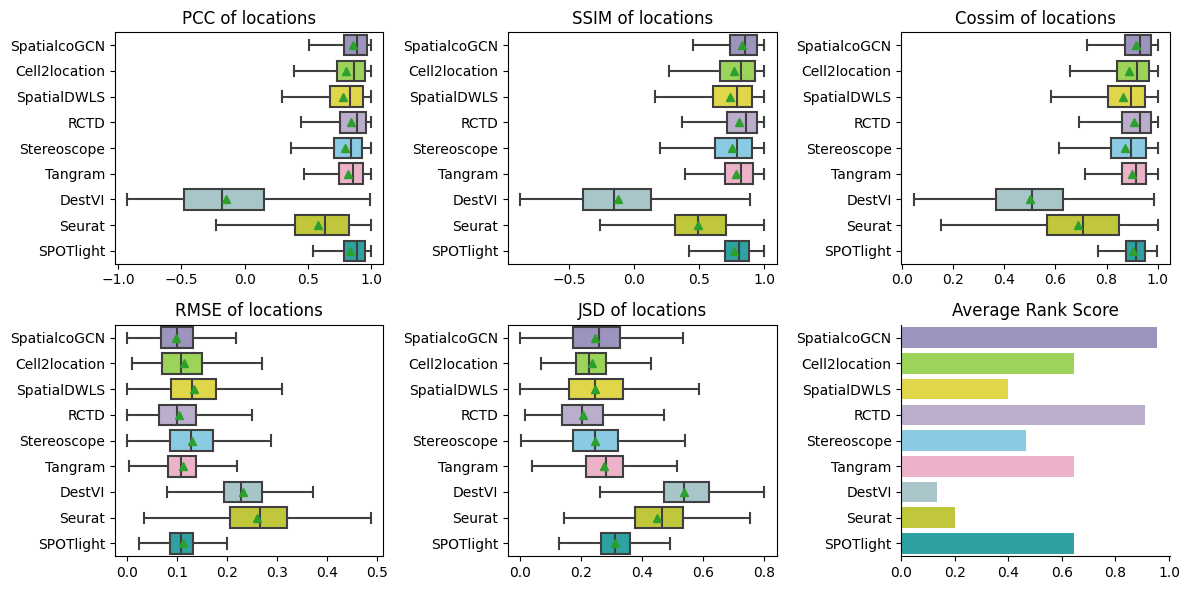

In [7]:
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(12,6))
order = ['SpatialcoGCN','Cell2location','SpatialDWLS','RCTD','Stereoscope','Tangram','DestVI', 'Seurat', 'SPOTlight']
colors = ["#988DC3","#9de846", '#F9EC31', "#BBA8D1", "#7BD1F1", "#F5A8C7",  "#A2CBCF","#D6DE23","#1AB5B7"]
sns.boxplot(data=spots_pcc,order=order,palette=colors,ax=axes[0,0],orient='h', showfliers = False,showmeans=True)
axes[0,0].set_title('PCC of locations')
sns.boxplot(data=spots_ssim,order=order,palette=colors,ax=axes[0,1],orient='h', showfliers = False,showmeans=True)
axes[0,1].set_title('SSIM of locations')
sns.boxplot(data=spots_rmse,order=order,palette=colors,ax=axes[1,0],orient='h', showfliers = False,showmeans=True)
axes[1,0].set_title('RMSE of locations')
sns.boxplot(data=spots_jsd,order=order,palette=colors,ax=axes[1,1],orient='h', showfliers = False,showmeans=True)
axes[1,1].set_title('JSD of locations')
sns.boxplot(data=spots_cossim,order=order,palette=colors,ax=axes[0,2],orient='h', showfliers = False,showmeans=True)
axes[0,2].set_title('Cossim of locations')

sns.barplot(data=ordered_result.iloc[[-1],:],order=order,palette=colors,ax=axes[1,2],orient='h',errorbar=('ci', 75))
axes[1,2].set_title('Average Rank Score')
axes[1,2].spines['top'].set_visible(False)
axes[1,2].spines['right'].set_visible(False)

#plt.delaxes(axes[1, 2])
plt.tight_layout()
# plot_file = os.path.join(DataDir+"results/metrics_plot.pdf")
# fig.savefig(plot_file,dpi=600,bbox_inches = "tight")
plt.show()